In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
from os import walk
from string import punctuation
from random import shuffle
from collections import Counter
import multiprocessing
import email


import sklearn as sk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bmall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bmall\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bmall\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bmall\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bmall\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
for root,dirs,files in os.walk('enron1', topdown=True):
    
    print (root)
    print (dirs)
    print (files)
    print ('--------------------------------')






enron1
['ham', 'spam']
['Summary.txt']
--------------------------------
enron1\ham
[]
['0001.1999-12-10.farmer.ham.txt', '0002.1999-12-13.farmer.ham.txt', '0003.1999-12-14.farmer.ham.txt', '0004.1999-12-14.farmer.ham.txt', '0005.1999-12-14.farmer.ham.txt', '0007.1999-12-14.farmer.ham.txt', '0009.1999-12-14.farmer.ham.txt', '0010.1999-12-14.farmer.ham.txt', '0011.1999-12-14.farmer.ham.txt', '0012.1999-12-14.farmer.ham.txt', '0013.1999-12-14.farmer.ham.txt', '0014.1999-12-15.farmer.ham.txt', '0015.1999-12-15.farmer.ham.txt', '0016.1999-12-15.farmer.ham.txt', '0019.1999-12-15.farmer.ham.txt', '0020.1999-12-15.farmer.ham.txt', '0021.1999-12-15.farmer.ham.txt', '0022.1999-12-16.farmer.ham.txt', '0023.1999-12-16.farmer.ham.txt', '0024.1999-12-16.farmer.ham.txt', '0025.1999-12-16.farmer.ham.txt', '0027.1999-12-17.farmer.ham.txt', '0028.1999-12-17.farmer.ham.txt', '0029.1999-12-17.farmer.ham.txt', '0030.1999-12-20.farmer.ham.txt', '0031.1999-12-20.farmer.ham.txt', '0033.1999-12-20.farmer.ham.t

In [19]:
pathwalk = walk(r"enron1")

allHamData, allSpamData = [], []

for root, dr, file in pathwalk:
    if 'ham' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                allHamData.append(" ".join(ip.readlines()))
                
    elif 'spam' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                allSpamData.append(" ".join(ip.readlines()))






hamPlusSpamData = allHamData + allSpamData
labels = ["ham"]*len(allHamData) + ["spam"]*len(allSpamData)

raw_df = pd.DataFrame({"email": hamPlusSpamData, 
                       "label": labels})




#raw_df.info()

raw_df.head(5)


,email,label
0,Subject: christmas tree farm pictures\n,ham
1,"Subject: vastar resources , inc .\n gary , pro...",ham
2,Subject: calpine daily gas nomination\n - calp...,ham
3,Subject: re : issue\n fyi - see note below - a...,ham
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham


In [20]:
print("\n"+'-'*25)
print("shape of data:",raw_df.shape) 
print("\n"+'-'*25)
print("\nno dimensions of data:",raw_df.ndim)
print("\n"+'-'*25)
print("\nsize of data:",raw_df.size)
print("\n"+'-'*25)
print("\nSum fo all null values:\n",raw_df.isnull().sum())
print("\n"+'-'*25)


-------------------------
shape of data: (5172, 2)

-------------------------

no dimensions of data: 2

-------------------------

size of data: 10344

-------------------------

Sum fo all null values:
 email    0
label    0
dtype: int64

-------------------------


In [22]:
print("Column Names : \n"+'-'*25)
print(raw_df.columns)


Column Names : 
-------------------------
Index(['email', 'label'], dtype='object')


In [23]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5172 non-null   object
 1   label   5172 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [24]:
print("Count of label:\n",raw_df['label'].value_counts())

Count of label:
 ham     3672
spam    1500
Name: label, dtype: int64


In [25]:
raw_df['length'] = raw_df.email.str.len()
raw_df.head()

,email,label,length
0,Subject: christmas tree farm pictures\n,ham,38
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429
2,Subject: calpine daily gas nomination\n - calp...,ham,77
3,Subject: re : issue\n fyi - see note below - a...,ham,1219
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183


In [26]:
data=raw_df
data.head()

,email,label,length
0,Subject: christmas tree farm pictures\n,ham,38
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429
2,Subject: calpine daily gas nomination\n - calp...,ham,77
3,Subject: re : issue\n fyi - see note below - a...,ham,1219
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183


Data Pre-Processing

Since the data in raw form, we first have to preprocess it to make it more optimized

1. Removing Punctuations
removing punctuations such as commas and full-stops from the data# 

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
# Function to remove punctuations.
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

data["body_text_clean"] = data["email"].apply(lambda x: remove_punc(x))

data.head()

,email,label,length,body_text_clean
0,Subject: christmas tree farm pictures\n,ham,38,Subject christmas tree farm pictures\n
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429,Subject vastar resources inc \n gary product...
2,Subject: calpine daily gas nomination\n - calp...,ham,77,Subject calpine daily gas nomination\n calpin...
3,Subject: re : issue\n fyi - see note below - a...,ham,1219,Subject re issue\n fyi see note below alrea...
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183,Subject meter 7268 nov allocation\n fyi \n ...


2. Tokenization
tokenizing each word and storing as a list# 

In [29]:
import re

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x))

data.head()


,email,label,length,body_text_clean,body_text_tokenized
0,Subject: christmas tree farm pictures\n,ham,38,Subject christmas tree farm pictures\n,"[Subject, christmas, tree, farm, pictures, ]"
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429,Subject vastar resources inc \n gary product...,"[Subject, vastar, resources, inc, gary, produc..."
2,Subject: calpine daily gas nomination\n - calp...,ham,77,Subject calpine daily gas nomination\n calpin...,"[Subject, calpine, daily, gas, nomination, cal..."
3,Subject: re : issue\n fyi - see note below - a...,ham,1219,Subject re issue\n fyi see note below alrea...,"[Subject, re, issue, fyi, see, note, below, al..."
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183,Subject meter 7268 nov allocation\n fyi \n ...,"[Subject, meter, 7268, nov, allocation, fyi, f..."


In [30]:
# 3. Removing Stopwords
# using NLTK :: Natural Language Toolkit to remove/filter out the stopwords (useless data)

import nltk

stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]# to remove all stopwords
    return text

data["body_text_nonstop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
data.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop
0,Subject: christmas tree farm pictures\n,ham,38,Subject christmas tree farm pictures\n,"[Subject, christmas, tree, farm, pictures, ]","[Subject, christmas, tree, farm, pictures, ]"
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429,Subject vastar resources inc \n gary product...,"[Subject, vastar, resources, inc, gary, produc...","[Subject, vastar, resources, inc, gary, produc..."
2,Subject: calpine daily gas nomination\n - calp...,ham,77,Subject calpine daily gas nomination\n calpin...,"[Subject, calpine, daily, gas, nomination, cal...","[Subject, calpine, daily, gas, nomination, cal..."
3,Subject: re : issue\n fyi - see note below - a...,ham,1219,Subject re issue\n fyi see note below alrea...,"[Subject, re, issue, fyi, see, note, below, al...","[Subject, issue, fyi, see, note, already, done..."
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183,Subject meter 7268 nov allocation\n fyi \n ...,"[Subject, meter, 7268, nov, allocation, fyi, f...","[Subject, meter, 7268, nov, allocation, fyi, f..."


4. Stemming

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language


In [31]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

data["body_text_stemmed"] = data["body_text_nonstop"].apply(lambda x: stemming(x))
data.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,Subject: christmas tree farm pictures\n,ham,38,Subject christmas tree farm pictures\n,"[Subject, christmas, tree, farm, pictures, ]","[Subject, christmas, tree, farm, pictures, ]","[subject, christma, tree, farm, pictur, ]"
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429,Subject vastar resources inc \n gary product...,"[Subject, vastar, resources, inc, gary, produc...","[Subject, vastar, resources, inc, gary, produc...","[subject, vastar, resourc, inc, gari, product,..."
2,Subject: calpine daily gas nomination\n - calp...,ham,77,Subject calpine daily gas nomination\n calpin...,"[Subject, calpine, daily, gas, nomination, cal...","[Subject, calpine, daily, gas, nomination, cal...","[subject, calpin, daili, ga, nomin, calpin, da..."
3,Subject: re : issue\n fyi - see note below - a...,ham,1219,Subject re issue\n fyi see note below alrea...,"[Subject, re, issue, fyi, see, note, below, al...","[Subject, issue, fyi, see, note, already, done...","[subject, issu, fyi, see, note, alreadi, done,..."
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183,Subject meter 7268 nov allocation\n fyi \n ...,"[Subject, meter, 7268, nov, allocation, fyi, f...","[Subject, meter, 7268, nov, allocation, fyi, f...","[subject, meter, 7268, nov, alloc, fyi, forwar..."


In [33]:
# Lemmatization
# Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

data["body_text_lemmatized"] = data["body_text_stemmed"].apply(lambda x: lemmatizer(x))
data.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,Subject: christmas tree farm pictures\n,ham,38,Subject christmas tree farm pictures\n,"[Subject, christmas, tree, farm, pictures, ]","[Subject, christmas, tree, farm, pictures, ]","[subject, christma, tree, farm, pictur, ]","[subject, christma, tree, farm, pictur, ]"
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429,Subject vastar resources inc \n gary product...,"[Subject, vastar, resources, inc, gary, produc...","[Subject, vastar, resources, inc, gary, produc...","[subject, vastar, resourc, inc, gari, product,...","[subject, vastar, resourc, inc, gari, product,..."
2,Subject: calpine daily gas nomination\n - calp...,ham,77,Subject calpine daily gas nomination\n calpin...,"[Subject, calpine, daily, gas, nomination, cal...","[Subject, calpine, daily, gas, nomination, cal...","[subject, calpin, daili, ga, nomin, calpin, da...","[subject, calpin, daili, ga, nomin, calpin, da..."
3,Subject: re : issue\n fyi - see note below - a...,ham,1219,Subject re issue\n fyi see note below alrea...,"[Subject, re, issue, fyi, see, note, below, al...","[Subject, issue, fyi, see, note, already, done...","[subject, issu, fyi, see, note, alreadi, done,...","[subject, issu, fyi, see, note, alreadi, done,..."
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183,Subject meter 7268 nov allocation\n fyi \n ...,"[Subject, meter, 7268, nov, allocation, fyi, f...","[Subject, meter, 7268, nov, allocation, fyi, f...","[subject, meter, 7268, nov, alloc, fyi, forwar...","[subject, meter, 7268, nov, alloc, fyi, forwar..."


In [35]:
data['body_text_length'] = data.email.str.len()
data['body_text_clean_length'] = data.body_text_clean.str.len()

data.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_text_length,body_text_clean_length
0,Subject: christmas tree farm pictures\n,ham,38,Subject christmas tree farm pictures\n,"[Subject, christmas, tree, farm, pictures, ]","[Subject, christmas, tree, farm, pictures, ]","[subject, christma, tree, farm, pictur, ]","[subject, christma, tree, farm, pictur, ]",38,37
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429,Subject vastar resources inc \n gary product...,"[Subject, vastar, resources, inc, gary, produc...","[Subject, vastar, resources, inc, gary, produc...","[subject, vastar, resourc, inc, gari, product,...","[subject, vastar, resourc, inc, gari, product,...",4429,3283
2,Subject: calpine daily gas nomination\n - calp...,ham,77,Subject calpine daily gas nomination\n calpin...,"[Subject, calpine, daily, gas, nomination, cal...","[Subject, calpine, daily, gas, nomination, cal...","[subject, calpin, daili, ga, nomin, calpin, da...","[subject, calpin, daili, ga, nomin, calpin, da...",77,74
3,Subject: re : issue\n fyi - see note below - a...,ham,1219,Subject re issue\n fyi see note below alrea...,"[Subject, re, issue, fyi, see, note, below, al...","[Subject, issue, fyi, see, note, already, done...","[subject, issu, fyi, see, note, alreadi, done,...","[subject, issu, fyi, see, note, alreadi, done,...",1219,1048
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183,Subject meter 7268 nov allocation\n fyi \n ...,"[Subject, meter, 7268, nov, allocation, fyi, f...","[Subject, meter, 7268, nov, allocation, fyi, f...","[subject, meter, 7268, nov, alloc, fyi, forwar...","[subject, meter, 7268, nov, alloc, fyi, forwar...",1183,1030


In [37]:
#Total length removal
print("Original Length:",data['body_text_length'].sum())
print("Cleaned Length:",data['body_text_clean_length'].sum())
print("Total Words Removed:",(data['body_text_length'].sum()) - (data['body_text_clean_length'].sum()))

Original Length: 5423509
Cleaned Length: 5090817
Total Words Removed: 332692


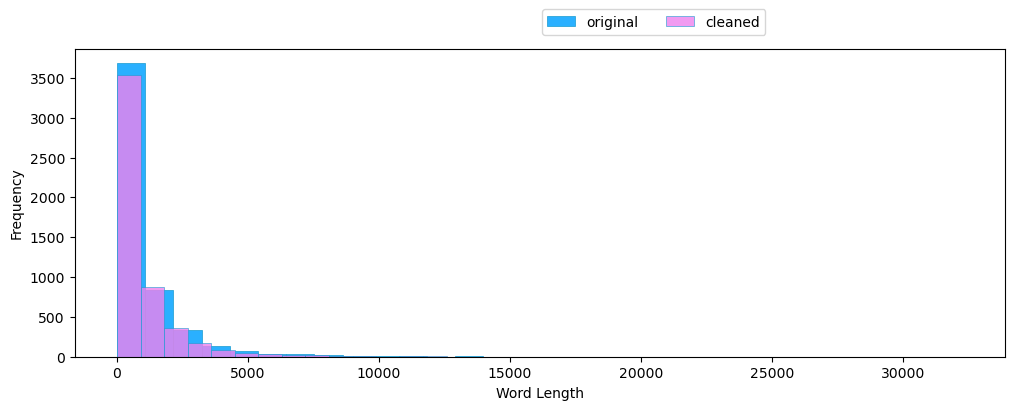

In [39]:
data['body_text_length'].plot(bins=30, kind='hist',figsize=(12,4), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5) ; 
data['body_text_clean_length'].plot(bins=30, kind='hist',figsize=(12,4),alpha =0.8, facecolor = 'violet', edgecolor='#169acf', linewidth=0.5);
plt.xlabel("Word Length");
plt.legend(['original', 'cleaned'], bbox_to_anchor=(0.75, 1.15), ncol=2);

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   email                   5172 non-null   object
 1   label                   5172 non-null   object
 2   length                  5172 non-null   int64 
 3   body_text_clean         5172 non-null   object
 4   body_text_tokenized     5172 non-null   object
 5   body_text_nonstop       5172 non-null   object
 6   body_text_stemmed       5172 non-null   object
 7   body_text_lemmatized    5172 non-null   object
 8   body_text_length        5172 non-null   int64 
 9   body_text_clean_length  5172 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 404.2+ KB


In [43]:
# Exploratory Data Analysis
# To find trends and patterns in this dataset, we perform exploratory data analysis.

# First, we define a new data column with numbers of characters, words and sentences

data_eda=data
#creating a new copy of the dataframe

In [45]:
data_eda['num_characters'] = data['email'].apply(len)
# num of words
data_eda['num_words'] = data['email'].apply(lambda x:len(nltk.word_tokenize(x)))
data_eda['num_sentences'] = data['email'].apply(lambda x:len(nltk.sent_tokenize(x)))
#data_eda.pop('length')
data_eda.head()

,email,label,length,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_text_length,body_text_clean_length,num_characters,num_words,num_sentences
0,Subject: christmas tree farm pictures\n,ham,38,Subject christmas tree farm pictures\n,"[Subject, christmas, tree, farm, pictures, ]","[Subject, christmas, tree, farm, pictures, ]","[subject, christma, tree, farm, pictur, ]","[subject, christma, tree, farm, pictur, ]",38,37,38,6,1
1,"Subject: vastar resources , inc .\n gary , pro...",ham,4429,Subject vastar resources inc \n gary product...,"[Subject, vastar, resources, inc, gary, produc...","[Subject, vastar, resources, inc, gary, produc...","[subject, vastar, resourc, inc, gari, product,...","[subject, vastar, resourc, inc, gari, product,...",4429,3283,4429,1579,16
2,Subject: calpine daily gas nomination\n - calp...,ham,77,Subject calpine daily gas nomination\n calpin...,"[Subject, calpine, daily, gas, nomination, cal...","[Subject, calpine, daily, gas, nomination, cal...","[subject, calpin, daili, ga, nomin, calpin, da...","[subject, calpin, daili, ga, nomin, calpin, da...",77,74,77,14,1
3,Subject: re : issue\n fyi - see note below - a...,ham,1219,Subject re issue\n fyi see note below alrea...,"[Subject, re, issue, fyi, see, note, below, al...","[Subject, issue, fyi, see, note, already, done...","[subject, issu, fyi, see, note, alreadi, done,...","[subject, issu, fyi, see, note, alreadi, done,...",1219,1048,1219,349,5
4,Subject: meter 7268 nov allocation\n fyi .\n -...,ham,1183,Subject meter 7268 nov allocation\n fyi \n ...,"[Subject, meter, 7268, nov, allocation, fyi, f...","[Subject, meter, 7268, nov, allocation, fyi, f...","[subject, meter, 7268, nov, alloc, fyi, forwar...","[subject, meter, 7268, nov, alloc, fyi, forwar...",1183,1030,1183,324,6


In [47]:
data_eda[['num_characters','num_words','num_sentences']].describe()
#let's see the information on this dataframe

,num_characters,num_words,num_sentences
count,5172.000000,5172.000000,5172.000000
mean,1048.628964,229.335847,10.023782
std,1528.639346,336.605833,21.902414
min,10.000000,2.000000,1.000000
25%,243.750000,52.000000,3.000000
50%,539.000000,122.000000,6.000000
75%,1236.250000,284.000000,11.000000
max,32258.000000,8863.000000,1163.000000


In [49]:
#for ham
data_eda[data_eda['label'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,976.987200,226.239107,8.634259
std,1382.810366,332.179661,21.912879
min,17.000000,3.000000,1.000000
25%,231.000000,51.000000,3.000000
50%,530.000000,124.000000,5.000000
75%,1227.250000,294.000000,10.000000
max,32258.000000,8863.000000,1163.000000


In [52]:
#for spam
data_eda[data_eda['label'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1500.000000,1500.000000,1500.000000
mean,1224.008000,236.916667,13.425333
std,1826.119545,347.199374,21.508250
min,10.000000,2.000000,1.000000
25%,282.000000,55.000000,3.000000
50%,575.500000,116.000000,7.000000
75%,1254.000000,245.250000,15.000000
max,22072.000000,3963.000000,359.000000


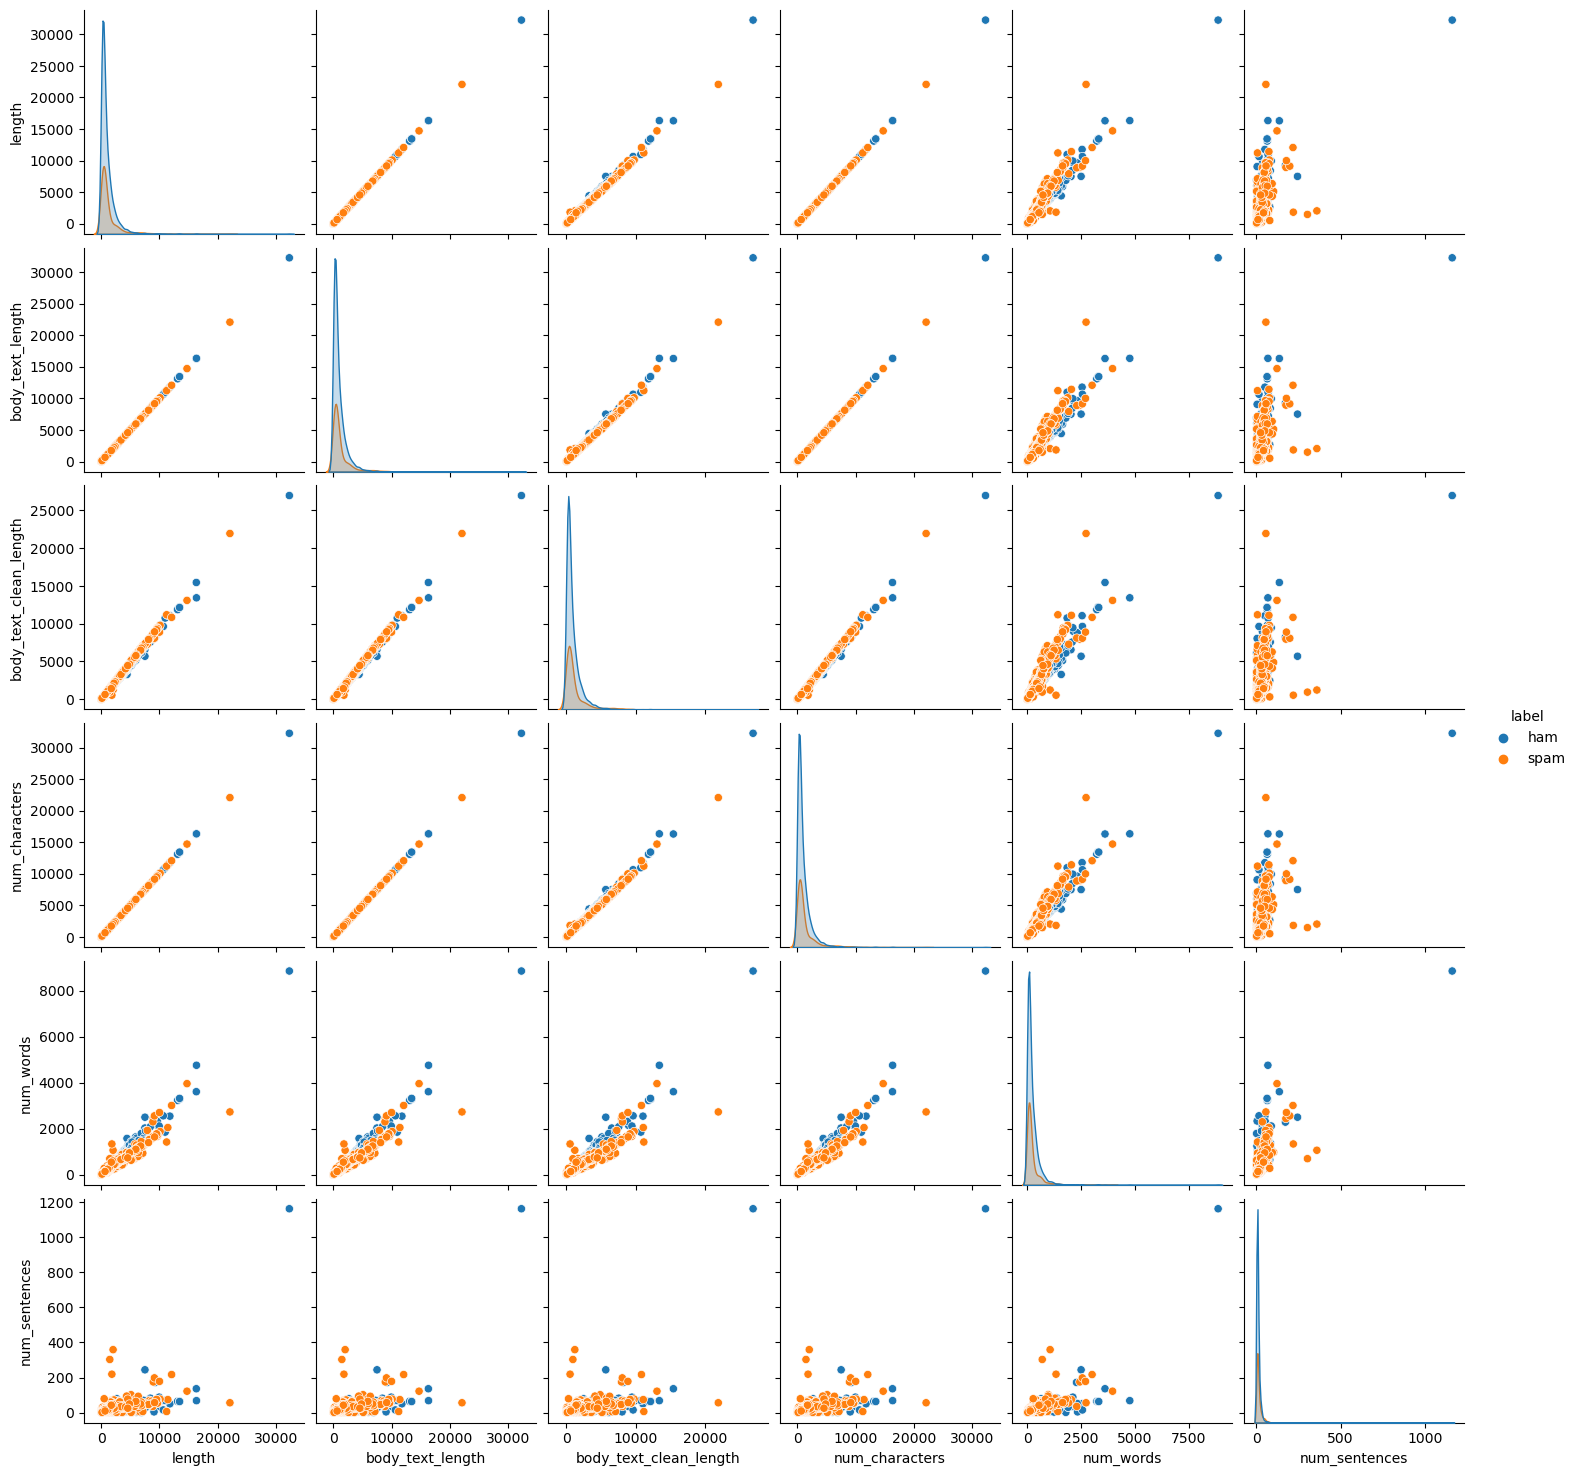

In [56]:
sns.pairplot(data_eda,hue='label')

C:\Users\bmall\AppData\Local\Temp\ipykernel_8852\930889174.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_eda.corr(),annot=True)


<Axes: >

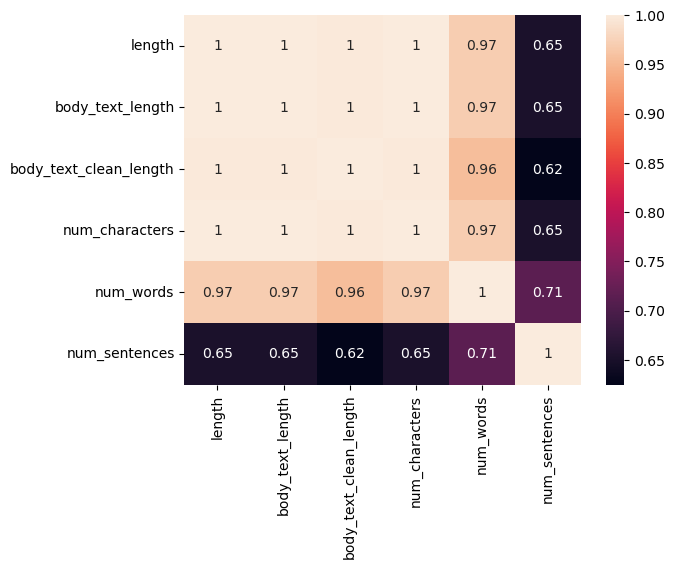

In [57]:
sns.heatmap(data_eda.corr(),annot=True)

C:\Users\bmall\AppData\Local\Temp\ipykernel_8852\1252120024.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # nice and clean grid


Text(0.5, 0, 'Word Length')

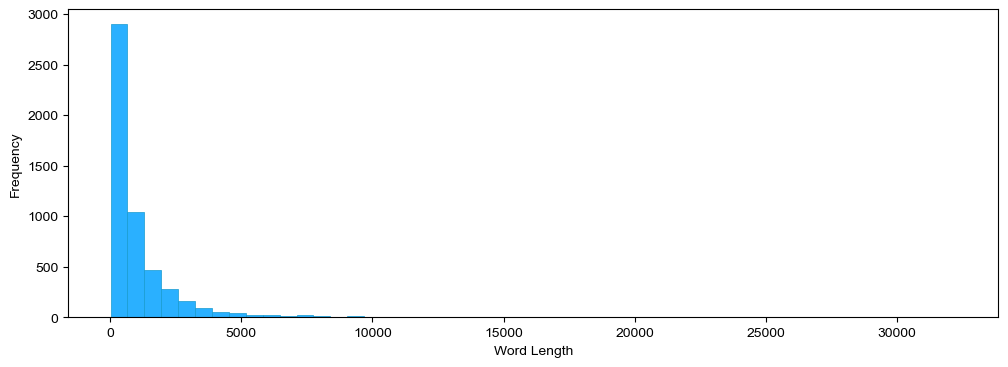

In [58]:
#checking the word length on a histogram
data['body_text_length'].plot(bins=50, kind='hist',figsize=(12,4), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5) 
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.xlabel("Word Length")

C:\Users\bmall\AppData\Local\Temp\ipykernel_8852\1462460516.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # nice and clean grid


Text(0.5, 0, 'Word Length')

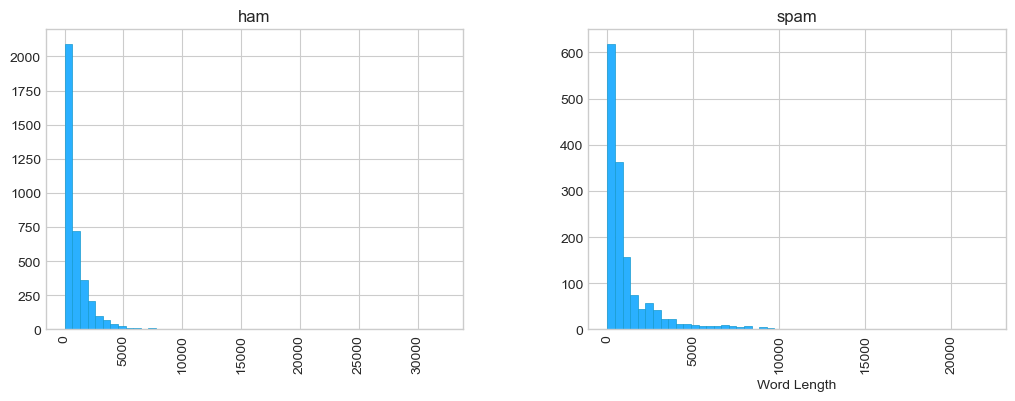

In [61]:
# x-axis ="length", separated by label,('ham' and 'spam')
data.hist(column='body_text_length', by='label', bins=50,figsize=(12,4), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5 );
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.xlabel("Word Length")

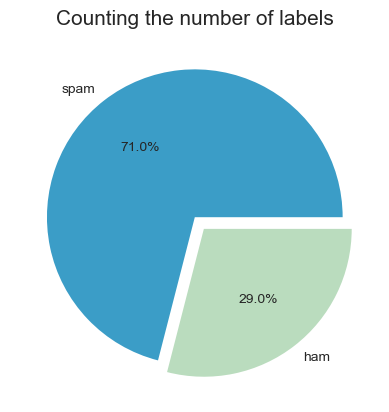

In [64]:
#using pie chart to show the count of ham and spam emails
# only "explode" the 2nd slice (i.e. 'spam')
explode = (0, 0.1)
#add colors
colors = ['#3b9dc7','#badcbe']
plt.pie(data['label'].value_counts(), labels=['spam','ham'],autopct='%1.1f%%',colors=colors,explode=explode)
plt.title("Counting the number of labels",fontsize=15);
plt.show()

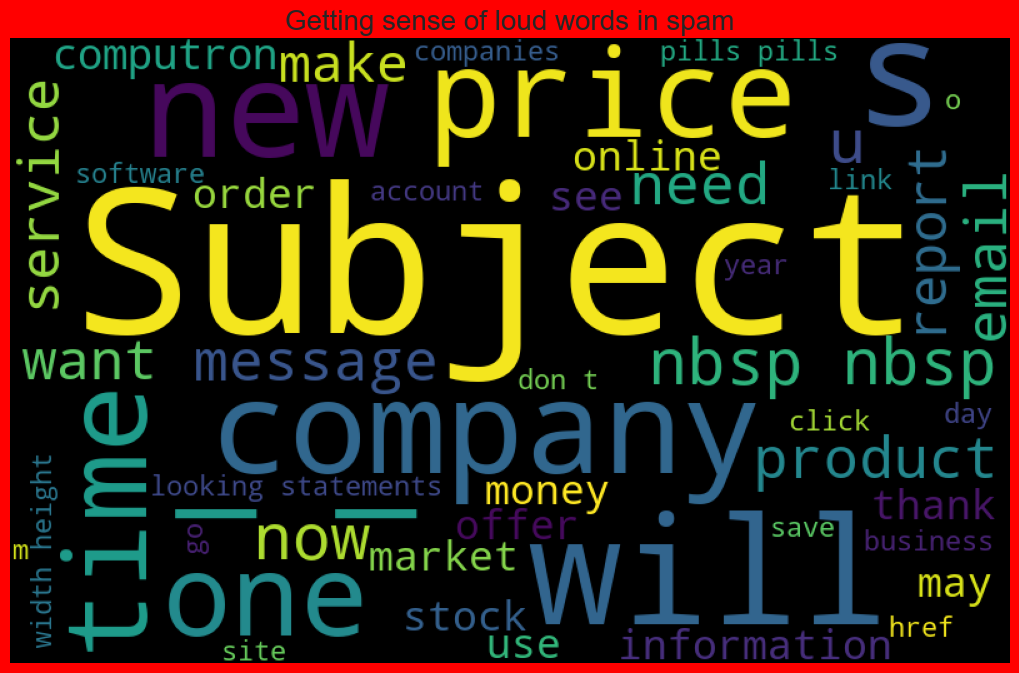

In [72]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud
#pip install wordcloud
spams = data['email'][data['label']=='spam']

spam_cloud = WordCloud(width=800,height=500,background_color='black',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in spam",fontsize=20);
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

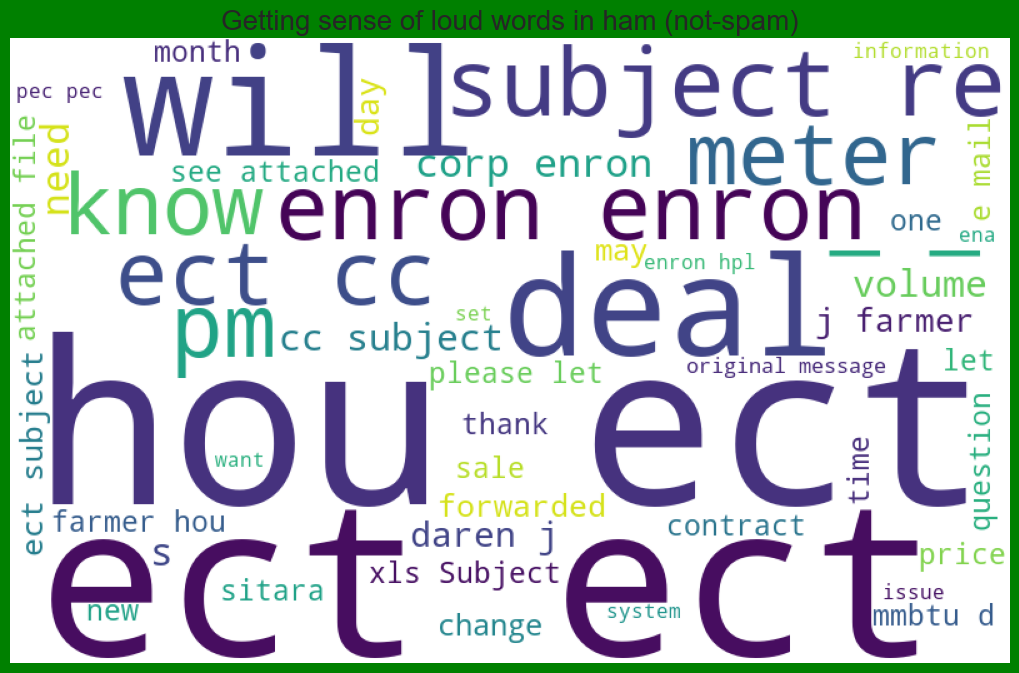

In [74]:
#Getting sense of loud words in not-spam 

not_spams = data['email'][data['label']=='ham']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in ham (not-spam)",fontsize=20);

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [84]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.

#data.to_csv("C:\Users\bmall\OneDrive\Desktop\EmailSpamCollection_cleaned.csv", sep=',')
#ata.to_csv("C:\\Users\\bmall\\OneDrive\\Desktop\\EmailSpamCollection_cleaned.csv", sep=',')

data.to_csv("C:\\Users\\bmall\\OneDrive\\Desktop\\EmailSpamCollection_cleaned.csv", sep=',', escapechar='\\')



In [87]:
# Vectorizing Data:
# Encoding Text as integer i.e. numeric form to create feature vectors so that we can apply ML algos on it.

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(data, color):
    trace = go.Bar(
        y=data["word"].values[::-1],
        x=data["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


In [89]:
pd.set_option('display.max_colwidth', 100) # To extend column width

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

#data = pd.read_csv("EmailSpamCollection_cleaned.csv")
#data.columns = ['label', 'email']

In [91]:
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)
      # Convert all titles to vectors
    word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
    for i, (_, text_) in enumerate(text.iterrows()):
        word_vectors[i] = text_to_vector(text_[0])

In [92]:
#Converting words to vector using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['email'])
vectors.shape
 
#features = word_vectors
features = vectors
features

<5172x50463 sparse matrix of type '<class 'numpy.float64'>'
	with 456405 stored elements in Compressed Sparse Row format>

# Applying ML Algorithms for Comparative Analysis
We'll apply some classification algorithms for comparative analysis to see which algorithm 
will yield the best results in terms of accuracy, precision, f1-score etc

In [94]:
#importing relevant depedencies 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

In [95]:
# Naive Bayes
# It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors.
#In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.2)
clf.fit(X_train, y_train)
y_pred_nb = clf.predict(X_test)
print(classification_report(y_test,y_pred_nb))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_nb),5)))
k1=round(accuracy_score(y_test,y_pred_nb),5)

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       558
        spam       0.98      0.93      0.95       218

    accuracy                           0.97       776
   macro avg       0.97      0.96      0.97       776
weighted avg       0.97      0.97      0.97       776

Accuracy score: 0.97423


In [96]:
from sklearn.metrics import precision_score
j1=round(precision_score(y_test, y_pred_nb, average='macro'),5)
j1

0.97478

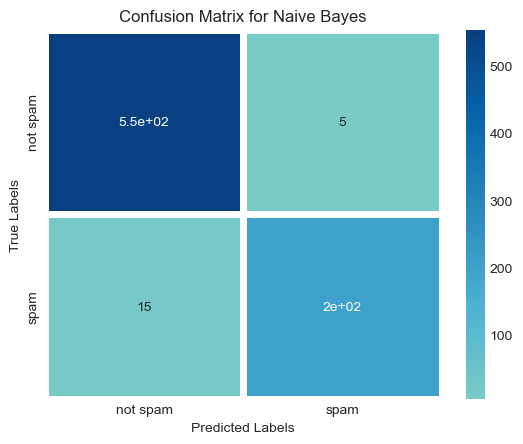

In [97]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_nb)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Naive Bayes')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()


In [99]:
# Support Vector Machine
# SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

# Classification Model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#Training multiple machine learning algorithms
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='sigmoid', gamma=1.0)

clfs = {'SVC' : svc}
def train(clf, features, targets):    
    clf.fit(features, targets)
def predict(clf, features):
    return (clf.predict(features))
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred_svm = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred_svm)]))

In [100]:
pred_scores_word_vectors

[('SVC', [0.9845360824742269])]

In [101]:
from sklearn.metrics import classification_report
print("Classification report")
print (classification_report(y_test, pred_svm))
print("Accuracy score: {}".format(round(accuracy_score(y_test,pred_svm),5)))
k2=round(accuracy_score(y_test,pred_svm),5)

Classification report
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       558
        spam       0.96      0.99      0.97       218

    accuracy                           0.98       776
   macro avg       0.98      0.99      0.98       776
weighted avg       0.98      0.98      0.98       776

Accuracy score: 0.98454


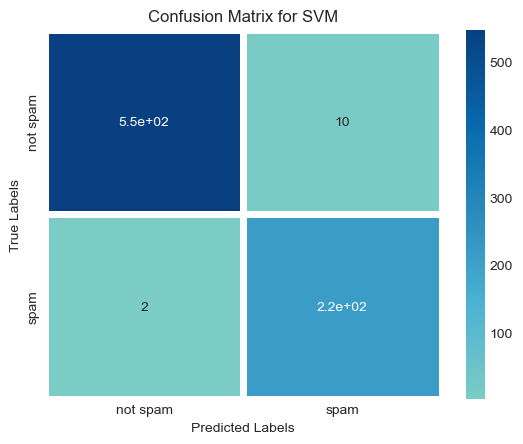

In [102]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,pred_svm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for SVM')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [103]:
# Random Forest
# The random forest is a classification algorithm consisting of many decisions trees.
# It uses bagging and feature randomness when building each individual tree to try to create 
# an uncorrelated forest of trees whose prediction by committee is more accurate than that of
# any individual tree.

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred_rf, pos_label='spam', average='binary')
print(classification_report(y_test,y_pred_rf))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_rf),5)))
k3=round(accuracy_score(y_test,y_pred_rf),5)

              precision    recall  f1-score   support

         ham       0.88      0.99      0.93       558
        spam       0.97      0.66      0.78       218

    accuracy                           0.90       776
   macro avg       0.93      0.82      0.86       776
weighted avg       0.91      0.90      0.89       776

Accuracy score: 0.8982


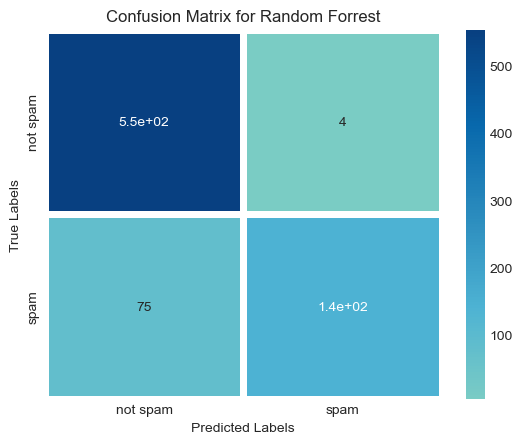

In [104]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_rf)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Random Forrest')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [105]:
# K Nearest Neighbors
# K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore", category=DeprecationWarning)

clf = KNeighborsClassifier(n_neighbors=149, weights='uniform', algorithm='auto', p=1,metric='euclidean', n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
print(classification_report(y_test,y_pred_knn))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_knn),5)));
k4=round(accuracy_score(y_test,y_pred_knn),5)

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       558
        spam       0.96      0.74      0.84       218

    accuracy                           0.92       776
   macro avg       0.93      0.87      0.89       776
weighted avg       0.92      0.92      0.92       776

Accuracy score: 0.91881


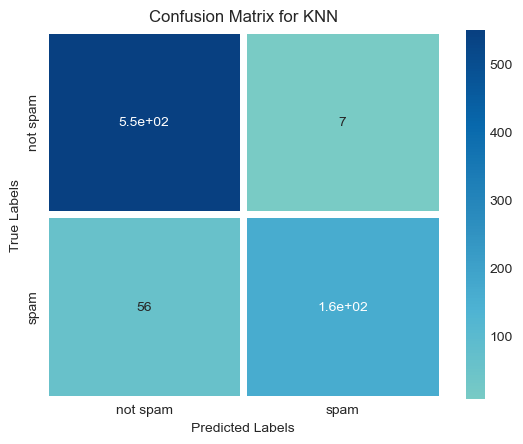

In [106]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_knn)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,cmap="GnBu",center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for KNN')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [107]:
# Logistic Regression
# Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). ... Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

from sklearn.linear_model import LinearRegression, LogisticRegression
from numpy.random import RandomState
from sklearn import preprocessing

seed = RandomState()

In [108]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

y_pred_lr = logisticRegr.predict(X_test)
print(classification_report(y_test,y_pred_lr))
print("Accuracy score: {}".format(round(accuracy_score(y_test,y_pred_lr),5)));
k5=round(accuracy_score(y_test,y_pred_lr),5)


              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       558
        spam       0.96      1.00      0.98       218

    accuracy                           0.99       776
   macro avg       0.98      0.99      0.99       776
weighted avg       0.99      0.99      0.99       776

Accuracy score: 0.9884


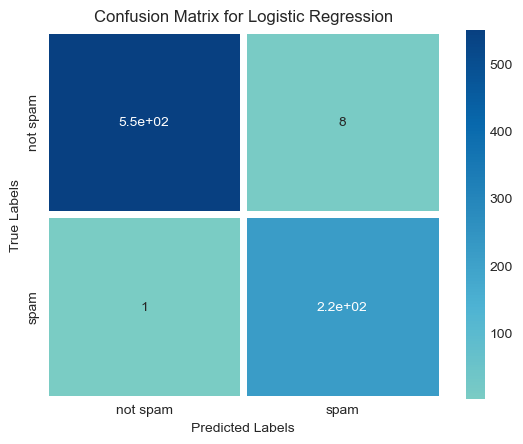

In [109]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred_lr)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,center=0,cmap="GnBu")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Logistic Regression')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()


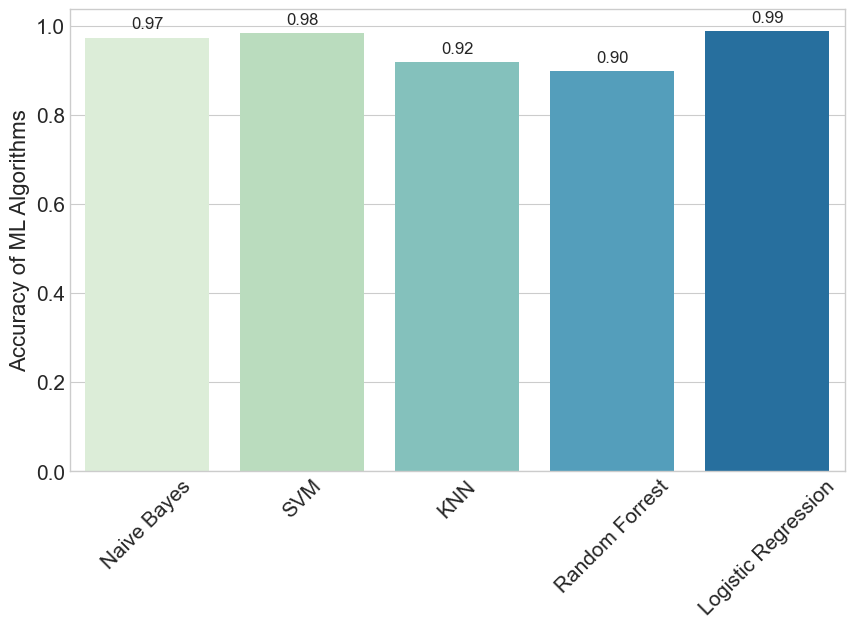

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of algorithms (x-axis)
algos = ['Naive Bayes', 'SVM', 'KNN', 'Random Forrest', 'Logistic Regression']

# Your list of accuracy values (y-axis)
acc = [k1, k2, k4, k3, k5]

# Create a barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x=algos, y=acc, palette="GnBu")

# Add labels and set tick label sizes
plt.ylabel("Accuracy of ML Algorithms", fontsize=16)
plt.tick_params(labelsize=15)

# Annotate the bars with accuracy values
for i, v in enumerate(acc):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)  # Adjust the 0.02 and fontsize as needed

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
